In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from lifelines.utils import k_fold_cross_validation
from sklearn.model_selection import train_test_split

In [66]:
import os
import pandas as pd

# Obtener la ruta absoluta del directorio actual
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Subimos un nivel

# Construir la ruta relativa al archivo Excel
ruta_bdd = os.path.join(base_dir, "Datos", "database.xlsx")

data = pd.read_excel(ruta_bdd, sheet_name="1012")  # Leer todas las hojas



In [67]:
data

,FECHA,Caudal,TPH,% Solido,Presion,Bateria,Ciclón,Medicion,horometro,camino_id,uso_230,TPH_acum,dias_230,solido_uso,carga_solidos_efectiva,ratio_tph_caudal,solido_presion,score,score_out,E
0,2018-03-05,4794.077975,4567.689947,71.768920,10.070017,BHC 1012,CyA,240.00,13214.618164,1012 CyA_2017-09-12,7.782281,13703.069842,174,817.201347,2156.410490,0.952778,722.714250,0.032426,0,1
1,2019-03-18,4986.616699,4612.531738,65.829060,9.684986,BHC 1012,CyA,235.00,18746.191406,1012 CyA_2019-01-07,6.909231,9225.063477,70,832.306727,1423.694123,0.924982,637.553528,0.029401,0,0
2,2019-12-29,5169.813957,4779.259657,68.912043,9.843077,BHC 1012,CyA,240.00,22316.537109,1012 CyA_2019-10-08,6.884581,9558.519313,82,874.010251,1492.775835,0.924455,678.306544,0.028686,0,1
3,2023-09-30,4285.925537,4754.181396,70.382466,9.813123,BHC 1012,CyA,240.00,38796.384766,1012 CyA_2023-07-21,7.032109,9508.362793,71,876.263870,1768.409741,1.109254,690.671816,0.029300,0,1
4,2018-10-02,5086.992279,4536.499026,78.409096,9.825271,BHC 1012,CyB,240.00,14060.440430,1012 CyB_2018-07-14,7.115757,13609.497078,80,966.134048,2366.103182,0.891784,770.390628,0.029649,0,1
5,2019-03-18,4986.616699,4612.531738,65.829060,9.684986,BHC 1012,CyB,240.00,16880.505859,1012 CyB_2019-01-07,7.206223,9225.063477,70,802.184633,1375.824108,0.924982,637.553528,0.030026,0,1
6,2018-09-03,5331.113525,4397.804321,78.409096,9.818191,BHC 1012,CyD,240.00,20321.634766,1012 CyD_2018-07-14,6.773920,8795.608643,51,1008.617185,1523.806850,0.824932,769.835482,0.028225,0,1
7,2019-03-18,4986.616699,4612.531738,65.829060,9.684986,BHC 1012,CyD,235.00,23005.978516,1012 CyD_2019-01-07,6.812468,9225.063477,70,842.615462,1440.019872,0.924982,637.553528,0.028989,0,0
8,2019-03-18,5189.176153,4268.943727,74.215750,9.691179,BHC 1012,CyE,240.00,20511.232422,1012 CyE_2018-05-30,8.086333,25613.662361,292,816.784422,3743.468903,0.822663,719.238149,0.033693,0,1
9,2020-08-17,5104.609187,4490.618815,68.990445,9.836283,BHC 1012,CyE,240.00,25641.679688,1012 CyE_2019-12-29,8.040083,13471.856445,232,763.161625,1876.702812,0.879718,678.609554,0.033500,0,1


In [68]:
# # Concatenamos los dataframes de cada key:
# data = pd.concat(data.values(), ignore_index=True)
# print(data.shape)
# data.head()

In [69]:
data.columns

Index(['FECHA', 'Caudal', 'TPH', '% Solido', 'Presion', 'Bateria', 'Ciclón',
       'Medicion', 'horometro', 'camino_id', 'uso_230', 'TPH_acum', 'dias_230',
       'solido_uso', 'carga_solidos_efectiva', 'ratio_tph_caudal',
       'solido_presion', 'score', 'score_out', 'E'],
      dtype='object')

In [70]:
from lifelines import CoxPHFitter

# Seleccionar las columnas relevantes para el modelo
formula_str = "uso_230 + TPH_acum + horometro"

# Ajustar el modelo de riesgos proporcionales de Cox
cph = CoxPHFitter()
cph.fit(data, duration_col="dias_230", event_col="E", formula = formula_str)

# Mostrar el resumen del modelo
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 26 total observations, 13 right-censored observations>
             duration col = 'dias_230'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 26
number of events observed = 13
   partial log-likelihood = -20.40
         time fit was run = 2025-02-20 12:45:29 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
uso_230   -2.15      0.12      0.82           -3.76           -0.55                0.02                0.58
TPH_acum  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
horometro -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to     z    p  -log2(p)
covariate                             
uso_230      0.00 -2.63 0.01      6.88
TPH_acum     0.00 -1.69 0.09      3.45
horometro    0.00 -1.83 0.07      3.89
---
Concordance = 0.85
Partial AIC = 46.81
log-likelihood ratio test = 14.89 on 3 df
-log2(p) of ll-ratio test = 9.03

### Evaluación

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.utils import concordance_index
from IPython.display import display

# ------------------------------------------------------------
# 1. Dividir datos en entrenamiento y prueba
# ------------------------------------------------------------
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# ------------------------------------------------------------
# 2. Ajustar el modelo de Cox en el set de entrenamiento
# ------------------------------------------------------------
formula_str = "uso_230 + TPH_acum + horometro"  # Ajusta según tus covariables

cph = CoxPHFitter()
cph.fit(train_data, duration_col="dias_230", event_col="E", formula=formula_str)

print("Resumen del modelo Cox (con datos de entrenamiento):")
cph.print_summary()  # Coeficientes, p-valores, etc.

# ------------------------------------------------------------
# 3. Evaluar el desempeño en el set de prueba
# ------------------------------------------------------------
# 3.1. Calcular el riesgo parcial (hazard) para cada individuo en test
pred_risk = cph.predict_partial_hazard(test_data)

# 3.2. Calcular c-index
# Nota: En supervivencia, un riesgo mayor implica tiempo de supervivencia más corto,
# por ello usamos "-pred_risk" para que un valor mayor se asocie a ocurrencia más temprana.
c_index = concordance_index(
    event_times=test_data["dias_230"],
    predicted_scores=-pred_risk,
    event_observed=test_data["E"]
)
print(f"\nC-index en el set de prueba: {c_index:.3f}")

Resumen del modelo Cox (con datos de entrenamiento):


<lifelines.CoxPHFitter: fitted with 20 total observations, 11 right-censored observations>
             duration col = 'dias_230'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 20
number of events observed = 9
   partial log-likelihood = -14.33
         time fit was run = 2025-02-20 12:45:29 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
uso_230   -1.56      0.21      0.79           -3.11           -0.01                0.04                0.99
TPH_acum  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
horometro -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to     z    p  -log2(p)
covariate                             
uso_230      0.00 -1.97 0.05      4.36
TPH_acum     0.00 -0.71 0.48      1.07
horometro    0.00 -1.34 0.18      2.47
---
Concordance = 0.82
Partial AIC = 34.66
log-likelihood ratio test = 7.72 on 3 df
-log2(p) of ll-ratio test = 4.26


C-index en el set de prueba: 1.000


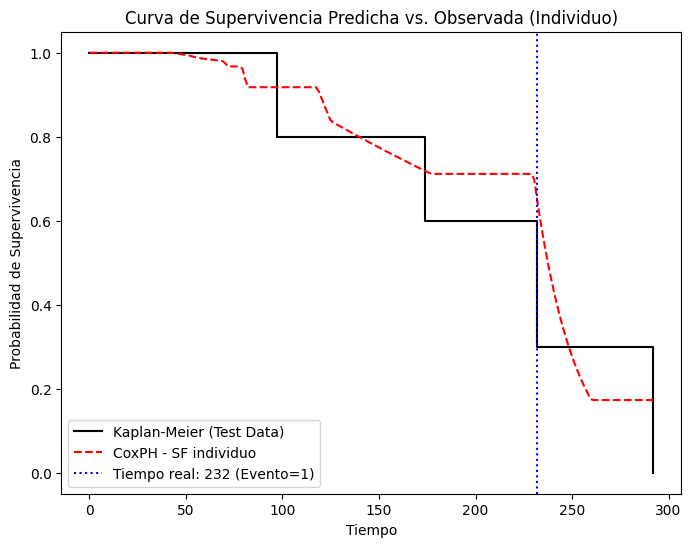


Predicciones (primeras 10 filas) con horizonte = 200 días:


,dias_230,E,uso_230,TPH_acum,horometro,pred_risk,surv_prob_200
8,292,1,8.086333,25613.662361,20511.232422,0.116358,0.827140
16,97,1,7.638406,9398.432381,19089.394531,1.047883,0.181026
0,174,1,7.782281,13703.069842,13214.618164,1.042535,0.182612
24,204,0,7.684742,9289.983669,25128.562500,0.542022,0.413108
11,56,0,6.939576,11973.813721,46996.837891,0.159414,0.771047
9,232,1,8.040083,13471.856445,25641.679688,0.208650,0.711549


In [72]:
# ------------------------------------------------------------
# 4. Presentar predicciones
# ------------------------------------------------------------
# 4.1. Curva de supervivencia predicha para un individuo en test
sample_subject = test_data.sample(1, random_state=0).copy()

# Información real del individuo
actual_time = sample_subject["dias_230"].values[0]
actual_event = sample_subject["E"].values[0]

# Rango de tiempos para graficar la función de supervivencia
tiempos = np.linspace(0, test_data["dias_230"].max(), 200)

# Curva de supervivencia predicha para el individuo
sf_pred = cph.predict_survival_function(sample_subject, times=tiempos)

# Comparación con Kaplan-Meier (en todo el set de prueba)
kmf = KaplanMeierFitter()
kmf.fit(test_data["dias_230"], event_observed=test_data["E"])

plt.figure(figsize=(8,6))
plt.step(kmf.survival_function_.index,
         kmf.survival_function_["KM_estimate"],
         where="post", label="Kaplan-Meier (Test Data)", color="black")
plt.plot(tiempos, sf_pred.iloc[:, 0],
         label="CoxPH - SF individuo", linestyle="--", color="red")

plt.axvline(actual_time, color="blue", linestyle=":",
            label=f"Tiempo real: {actual_time} (Evento={actual_event})")

plt.title("Curva de Supervivencia Predicha vs. Observada (Individuo)")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad de Supervivencia")
plt.legend()
plt.show()

# 4.2. Tabla de predicciones para varios individuos
#    - Riesgo parcial (pred_risk)
#    - Probabilidad de supervivencia a un horizonte de tiempo (ej. t=200 días)
horizonte = 200
test_data = test_data.copy()  # Para evitar SettingWithCopyWarning
test_data["pred_risk"] = pred_risk
# predice la supervivencia a un tiempo fijo para cada individuo
sf_200 = cph.predict_survival_function(test_data, times=[horizonte]).T
test_data[f"surv_prob_{horizonte}"] = sf_200.iloc[:, 0].values

# Mostrar las primeras filas
print(f"\nPredicciones (primeras 10 filas) con horizonte = {horizonte} días:")
display(test_data[[
    "dias_230", "E", "uso_230", "TPH_acum", "horometro", "pred_risk", f"surv_prob_{horizonte}"
]].head(10))


<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 20 total observations, 11 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic    p  -log2(p)
TPH_acum             2.62 0.11      3.24
horometro            0.00 1.00      0.01
uso_230              0.16 0.69      0.55

Individuo seleccionado:


,FECHA,Caudal,TPH,% Solido,Presion,Bateria,Ciclón,Medicion,horometro,camino_id,uso_230,TPH_acum,dias_230,solido_uso,carga_solidos_efectiva,ratio_tph_caudal,solido_presion,score,score_out,E
9,2020-08-17,5104.609187,4490.618815,68.990445,9.836283,BHC 1012,CyE,240.0,25641.679688,1012 CyE_2019-12-29,8.040083,13471.856445,232,763.161625,1876.702812,0.879718,678.609554,0.0335,0,1


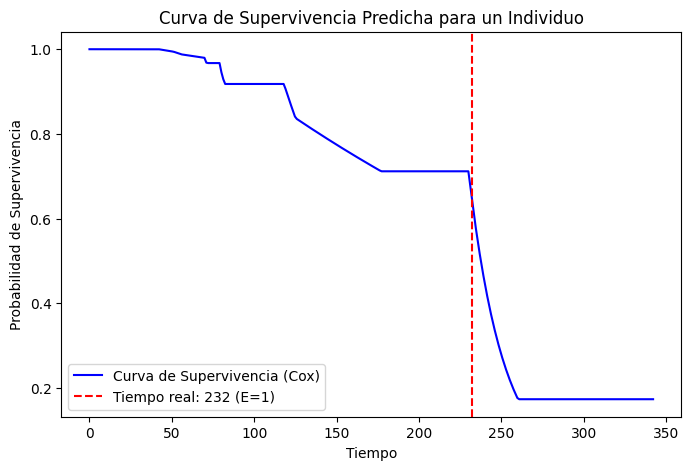

Valores mínimos y máximos de supervivencia: 0.17298252800775332 1.0
Tiempo de supervivencia estimado (S(t)=0.5): 237.91
Intervalo de confianza del 95%: (240.20, 340.86)


In [77]:
# ----------------------------------------------------------------------------
# 1. Supongamos que 'data' es tu DataFrame con:
#    - 'dias_230': tiempo hasta el evento o censura
#    - 'E': 1 si ocurrió el evento, 0 si está censurado
#    - 'uso_230', 'TPH_acum', 'horometro': variables predictoras
# ----------------------------------------------------------------------------

# Dividir datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Ajustar el modelo de Cox en el conjunto de entrenamiento
cph = CoxPHFitter()
cph.fit(train_data, duration_col="dias_230", event_col="E", formula="uso_230 + TPH_acum + horometro")

test_result = proportional_hazard_test(cph, train_data, time_transform='rank')
test_result.print_summary()

# ----------------------------------------------------------------------------
# 2. Seleccionar un individuo del conjunto de prueba para ilustrar
# ----------------------------------------------------------------------------
sample_subject = test_data.sample(1, random_state=25).copy()
# Extraer datos reales de este individuo
real_time = sample_subject["dias_230"].values[0]
real_event = sample_subject["E"].values[0]

print("Individuo seleccionado:")
display(sample_subject)

# ----------------------------------------------------------------------------
# 3. Graficar la curva de supervivencia predicha
# ----------------------------------------------------------------------------
# Definir un rango de tiempos para evaluar la supervivencia
max_time = test_data["dias_230"].max() + 50  # Un poco más allá del tiempo máximo observado
time_grid = np.linspace(0, max_time, 300)

# Curva de supervivencia predicha para el individuo
sf_pred = cph.predict_survival_function(sample_subject, times=time_grid)

# sf_pred es un DataFrame con shape (len(time_grid), n_subjects).
# Si solo tenemos 1 sujeto, sf_pred.iloc[:, 0] es la columna con la supervivencia.

plt.figure(figsize=(8,5))
plt.plot(time_grid, sf_pred.iloc[:, 0], label="Curva de Supervivencia (Cox)", color="blue")

# Marcamos la línea vertical del tiempo real
plt.axvline(real_time, color="red", linestyle="--", label=f"Tiempo real: {real_time} (E={real_event})")

plt.xlabel("Tiempo")
plt.ylabel("Probabilidad de Supervivencia")
plt.title("Curva de Supervivencia Predicha para un Individuo")
plt.legend()
plt.show()
print("Valores mínimos y máximos de supervivencia:", sf_pred.iloc[:, 0].min(), sf_pred.iloc[:, 0].max())
import numpy as np

def calculate_alternative_survival(sf_pred, time_grid, threshold=0.6, n_bootstrap=1000, ci=95):
    sf_values = sf_pred.iloc[:, 0].values  # Probabilidad de supervivencia en cada t

    # Encontrar el primer tiempo donde la supervivencia cae por debajo del threshold
    alternative_time_candidates = time_grid[sf_values <= threshold]

    if len(alternative_time_candidates) == 0:
        alternative_time = np.nan  # Si nunca baja del threshold
    else:
        alternative_time = alternative_time_candidates[0]  # Primer punto donde S(t) <= threshold

    # -------------------- Cálculo de Intervalo de Confianza (Bootstrap) --------------------
    boot_times = []

    for _ in range(n_bootstrap):
        sample_indices = np.random.choice(len(sf_values), size=len(sf_values), replace=True)
        sf_sample = sf_values[sample_indices]
        time_sample = time_grid[sample_indices]

        boot_candidates = time_sample[sf_sample <= threshold]
        if len(boot_candidates) > 0:
            boot_times.append(boot_candidates[0])

    # Manejo del caso vacío
    if len(boot_times) == 0:
        return alternative_time, (np.nan, np.nan)

    lower_bound = np.percentile(boot_times, (100 - ci) / 2)
    upper_bound = np.percentile(boot_times, 100 - (100 - ci) / 2)

    return alternative_time, (lower_bound, upper_bound)

# -------------------- Uso de la función --------------------
threshold = 0.5 # Usamos un umbral del 60% en lugar de la mediana
alternative_time, ci_time = calculate_alternative_survival(sf_pred, time_grid, threshold=threshold)

print(f"Tiempo de supervivencia estimado (S(t)={threshold}): {alternative_time:.2f}")
if np.isnan(ci_time[0]):
    print("No se pudo calcular el intervalo de confianza debido a la falta de datos en bootstrap.")
else:
    print(f"Intervalo de confianza del 95%: ({ci_time[0]:.2f}, {ci_time[1]:.2f})")
